In [63]:
import pandas as pd
import matplotlib.pyplot as plt
data = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data)


In [64]:
id = df[df["gender"] == "Other"].index
df = df.drop(id)
donnees_dupliquees = df.duplicated().any()

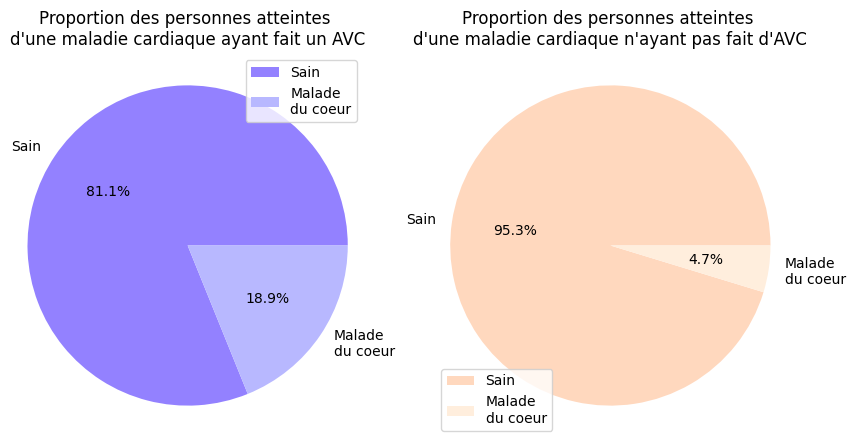

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
heart_diseases_stroke = df[df["stroke"] == 1]['heart_disease'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(heart_diseases_stroke, labels = ["Sain", "Malade\ndu coeur"], autopct='%1.1f%%', startangle=0, colors=["#9381FF","#B8B8FF"])
plt.title("Proportion des personnes atteintes \nd'une maladie cardiaque ayant fait un AVC")
plt.axis('equal') 
plt.legend()

heart_diseases_healthy = df[df["stroke"] == 0]['heart_disease'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(heart_diseases_healthy, labels = ["Sain", "Malade\ndu coeur"], autopct='%1.1f%%', startangle=0, colors=["#FFD8BE","#FFEEDD"])
plt.title("Proportion des personnes atteintes \nd'une maladie cardiaque n'ayant pas fait d'AVC")
plt.axis('equal') 
plt.legend()
plt.show()

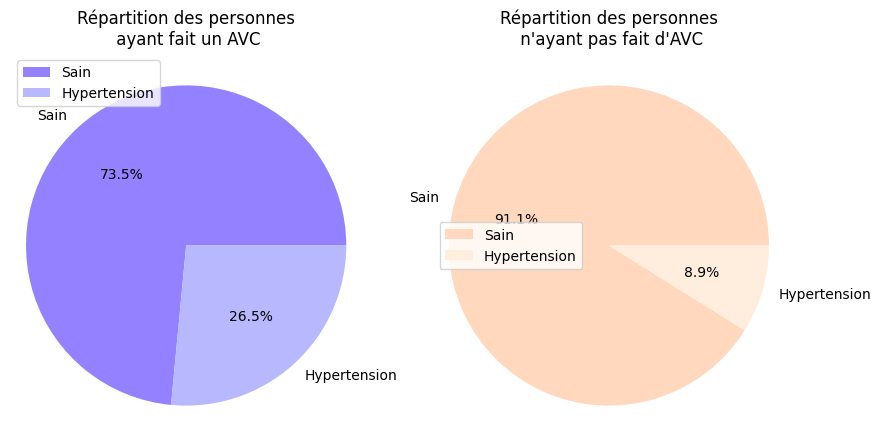

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
hypertension_stroke = df[df["stroke"] == 1]['hypertension'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(hypertension_stroke, labels = ["Sain", "Hypertension"], autopct='%1.1f%%', startangle=0, colors=["#9381FF","#B8B8FF"])
plt.title("Répartition des personnes\n ayant fait un AVC")
plt.axis('equal') 
plt.legend()

hypertension_healthy = df[df["stroke"] == 0]['hypertension'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(hypertension_healthy, labels = ["Sain", "Hypertension"], autopct='%1.1f%%', startangle=0, colors=["#FFD8BE","#FFEEDD"])
plt.title("Répartition des personnes\n n'ayant pas fait d'AVC")
plt.axis('equal') 
plt.legend()

plt.show()

In [67]:
from sklearn.calibration import LabelEncoder
import plotly.express as px

le = LabelEncoder()
df_par = df.copy()
for col in df.select_dtypes(exclude=['int64', 'float', 'float64', 'int']).columns:
    df_par[col] = le.fit_transform(df_par[col])
fig = px.parallel_coordinates(df_par.drop(columns=['id']), color="stroke", title='Visualization of Multivariate Data')

fig.show()

In [68]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['bmi'])
df_new = df_copy.drop(columns=['id','gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
fig = px.parallel_coordinates(df_new, color="stroke", title='Visualisation de la répartition des individus en fonction de leur âge, leur taux de glucose et leur IMC', color_continuous_scale=["#FFD8BE","#9381FF"], labels={"age": "Age", "avg_glucose_level": "Taux de glucose", "bmi": "IMC", "stroke": "AVC"})
fig.update_layout(
    coloraxis_colorbar=dict(
        title="AVC",
        tickvals=[0, 1],
        ticktext=["Non", "Oui"],
    )
)

fig.show()

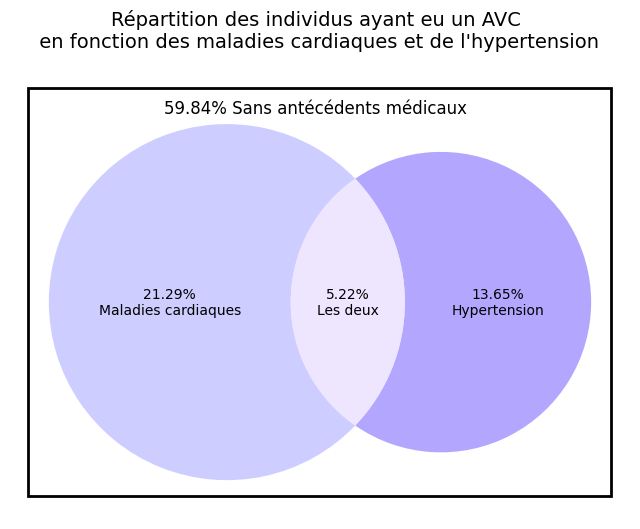

In [174]:
from matplotlib_venn import venn2
fig, ax = plt.subplots(figsize=(8, 6))

rectangle = plt.Rectangle((-0.74, -0.5), 1.5, 1.05, edgecolor='black', fill=False, linewidth=2)
ax.add_patch(rectangle)

all = df[(df["stroke"] == 1)].shape[0]
v3 = df[(df["stroke"] == 1) & (df["heart_disease"] == 1) & (df["hypertension"] == 1)].shape[0]
v2 = df[(df["stroke"] == 1) & (df["heart_disease"] == 1) & (df["hypertension"] == 0)].shape[0]
v1 = df[(df["stroke"] == 1) & (df["heart_disease"] == 0) & (df["hypertension"] == 1)].shape[0]
v4 = df[(df["stroke"] == 1) & (df["heart_disease"] == 0) & (df["hypertension"] == 0)].shape[0]


venn_diagram = venn2(subsets = (v1, v2, v3),set_colors=("#B8B8FF","#9381FF"), alpha=0.7, set_labels=None)
p1 = f"{round(v1 / all * 100, 2)}%\nMaladies cardiaques"
p2 = f"{round(v2 / all * 100, 2)}%\nHypertension"
p3 = f"{round(v3 / all * 100, 2)}%\nLes deux"
p4 = f"{round(v4 / all * 100, 2)}% Sans antécédents médicaux"
venn_diagram.get_label_by_id('10').set_text(p1)
venn_diagram.get_label_by_id('01').set_text(p2)
venn_diagram.get_label_by_id('11').set_text(p3)
plt.text(0, 0.50, p4, ha='center', va='center', fontsize=12, color='black')
plt.text(0, 0.7, "Répartition des individus ayant eu un AVC\n en fonction des maladies cardiaques et de l'hypertension", ha='center', va='center', fontsize=14, color='black')

plt.show()

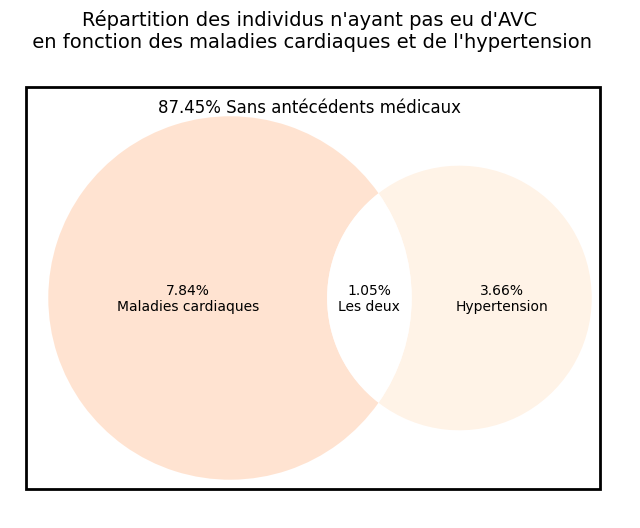

In [176]:
from matplotlib_venn import venn2
fig, ax = plt.subplots(figsize=(8, 6))

rectangle = plt.Rectangle((-0.74, -0.5), 1.5, 1.05, edgecolor='black', fill=False, linewidth=2)
ax.add_patch(rectangle)

all = df[(df["stroke"] == 0)].shape[0]
v3 = df[(df["stroke"] == 0) & (df["heart_disease"] == 1) & (df["hypertension"] == 1)].shape[0]
v2 = df[(df["stroke"] == 0) & (df["heart_disease"] == 1) & (df["hypertension"] == 0)].shape[0]
v1 = df[(df["stroke"] == 0) & (df["heart_disease"] == 0) & (df["hypertension"] == 1)].shape[0]
v4 = df[(df["stroke"] == 0) & (df["heart_disease"] == 0) & (df["hypertension"] == 0)].shape[0]


venn_diagram = venn2(subsets = (v1, v2, v3),set_colors=("#FFD8BE","#FFEEDD"), alpha=0.7, set_labels=None)
p1 = f"{round(v1 / all * 100, 2)}%\nMaladies cardiaques"
p2 = f"{round(v2 / all * 100, 2)}%\nHypertension"
p3 = f"{round(v3 / all * 100, 2)}%\nLes deux"
p4 = f"{round(v4 / all * 100, 2)}% Sans antécédents médicaux"
venn_diagram.get_label_by_id('10').set_text(p1)
venn_diagram.get_label_by_id('01').set_text(p2)
venn_diagram.get_label_by_id('11').set_text(p3)
plt.text(0, 0.50, p4, ha='center', va='center', fontsize=12, color='black')
plt.text(0, 0.7, "Répartition des individus n'ayant pas eu d'AVC\n en fonction des maladies cardiaques et de l'hypertension", ha='center', va='center', fontsize=14, color='black')

plt.show()

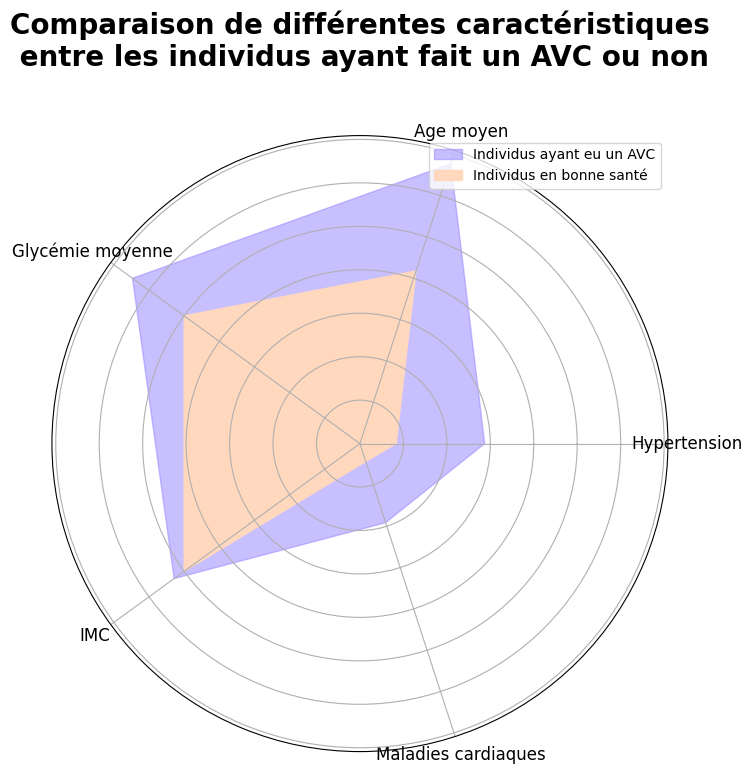

In [213]:
import numpy as np
import matplotlib.pyplot as plt
df_copy = df.copy()
df = df_copy.dropna(subset=['bmi'])
# Définir les données pour les deux diagrammes en radar
categories = ['Hypertension', "Age moyen", 'Glycémie moyenne ', 'IMC', 'Maladies cardiaques']
hypertension_healthy = df[(df["stroke"] == 0)]["hypertension"].mean()
age_healthy = df[(df["stroke"] == 0)]["age"].mean()
glucose_healthy = df[(df["stroke"] == 0)]["avg_glucose_level"].mean()
bmi_healthy = df[(df["stroke"] == 0)]["bmi"].mean()
heart_healthy = df[(df["stroke"] == 0)]["heart_disease"].mean()

hypertension_avc = df[(df["stroke"] == 1)]["hypertension"].mean()
age_avc = df[(df["stroke"] == 1)]["age"].mean()
glucose_avc = df[(df["stroke"] == 1)]["avg_glucose_level"].mean()
bmi_avc = df[(df["stroke"] == 1)]["bmi"].mean()
heart_avc = df[(df["stroke"] == 1)]["heart_disease"].mean()

values1 = [hypertension_healthy, age_healthy/100, 0.5, 0.5, heart_healthy]  # Les valeurs pour le premier radar
values2 = [hypertension_avc, age_avc/100, glucose_avc*0.5/glucose_healthy, bmi_avc*0.5/bmi_healthy, heart_avc]  # Les valeurs pour le deuxième radar

# Nombre de catégories
num_categories = len(categories)

# Créer un angle équitable entre les catégories
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Compléter le graphique en fermant la boucle
values1 += values1[:1]
angles += angles[:1]

values2 += values2[:1]

# Créer la figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values2, color="#9381FF", alpha=0.5, label='Individus ayant eu un AVC')

# Ploter les données pour le premier radar
ax.fill(angles, values1, color="#FFD8BE", alpha=1, label='Individus en bonne santé')

# Ploter les données pour le deuxième radar

# Ajouter les labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Afficher la légende
plt.legend(loc='upper right')

# Afficher le titre
plt.title('Comparaison de différentes caractéristiques\n entre les individus ayant fait un AVC ou non', size=20, color='black', fontweight='bold', y=1.1)

# Afficher le graphique
plt.show()
